In [1]:
import model, dataset
from importlib import reload

from torchinfo import summary
from torch.utils.data import Dataset, DataLoader

from matplotlib import pyplot as plt
import skimage

Image parameters settings: {'A': [500, 2000], 'bg': [0, 100], 'x': [-11.2, 11.2], 'y': [-11.2, 11.2], 'sig_x': [5, 5], 'sig_y': [5, 5]}
114:	 [id = 114.000,], [A = 1273.258,], [bg = 67.690,], [x = 11.199,], [y = -3.187,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
108:	 [id = 108.000,], [A = 626.900,], [bg = 84.278,], [x = 7.962,], [y = 8.823,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
56:	 [id = 56.000,], [A = 652.291,], [bg = 28.104,], [x = -6.913,], [y = 0.459,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
3:	 [id = 3.000,], [A = 1130.005,], [bg = 34.693,], [x = 6.562,], [y = -2.627,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
121:	 [id = 121.000,], [A = 1642.758,], [bg = 44.046,], [x = 7.828,], [y = -10.836,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
125:	 [id = 125.000,], [A = 1791.519,], [bg = 29.425,], [x = 8.447,], [y = -10.066,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
23:	 [id = 23.000,], [A = 1669.933,], [bg = 33.281,], [x = 1

C:\GitHub\smlm-dl\smlm_dl\dataset.py:302: RuntimeWarning: invalid value encountered in log
  im = axes[1].imshow(np.log(tiled_images))


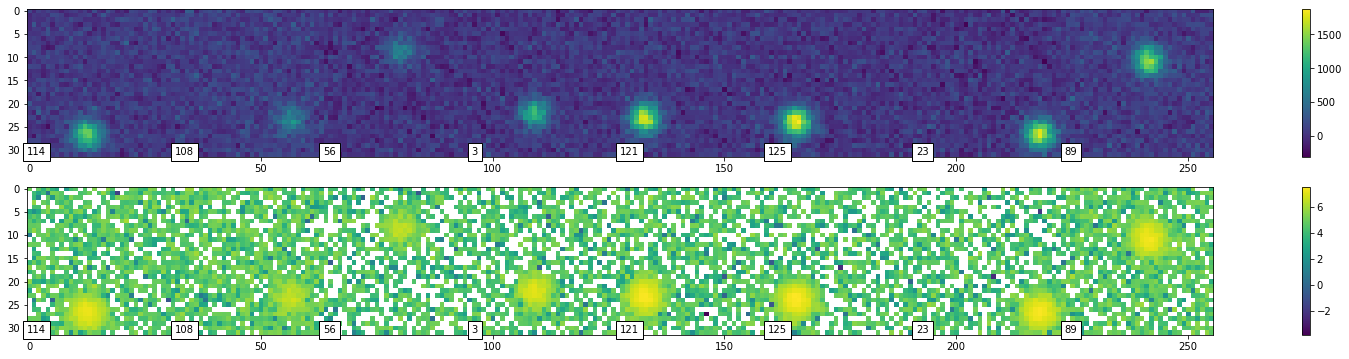

In [2]:
training_data = dataset.Gaussian2DPSFDataset(length=128, )
dataset.inspect_images(training_data)

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)

dd = next(iter(train_dataloader))

C:\Users\kkc29\Anaconda3\envs\smlm-dl\lib\site-packages\torch\cuda\__init__.py:80: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


Layer (type (var_name))                  Output Shape              Param #
ConvImageEncoderModel                    --                        --
├─ModuleDict (encoders)                  --                        --
│    └─Sequential (conv_layer0)          [32, 16, 16, 16]          --
│    │    └─Conv2d (0)                   [32, 16, 32, 32]          160
│    │    └─ReLU (1)                     [32, 16, 32, 32]          --
│    │    └─Conv2d (2)                   [32, 16, 32, 32]          2,320
│    │    └─ReLU (3)                     [32, 16, 32, 32]          --
│    │    └─MaxPool2d (4)                [32, 16, 16, 16]          --
│    │    └─Dropout2d (5)                [32, 16, 16, 16]          --
│    └─Sequential (conv_layer1)          [32, 32, 8, 8]            --
│    │    └─Conv2d (0)                   [32, 32, 16, 16]          4,640
│    │    └─ReLU (1)                     [32, 32, 16, 16]          --
│    │    └─Conv2d (2)                   [32, 32, 16, 16]          9,248
│    

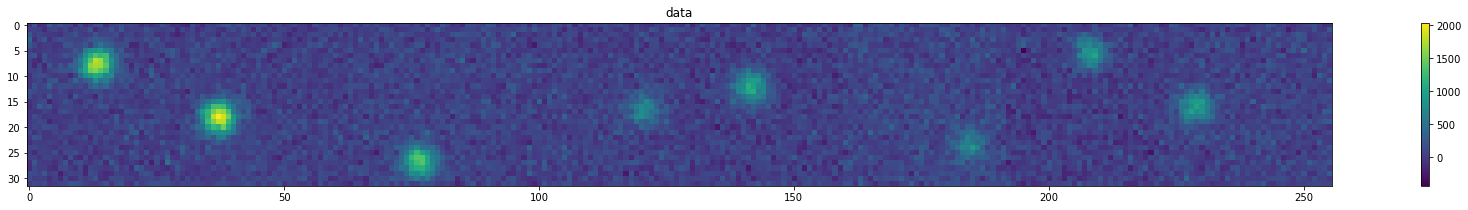

In [3]:
reload(model)
encoder_model = model.ConvImageEncoderModel(img_size=(32,32),
                                   depth=4,
                                   first_layer_out_channels=16)
print(summary(encoder_model, input_size=(32, 1, 32, 32), row_settings=["var_names"], depth=4))

model.check_model(encoder_model, train_dataloader)

Layer (type (var_name))                  Output Shape              Param #
IdEncoderModel                           --                        --
├─ModuleDict (encoders)                  --                        --
│    └─Linear (scale)                    [128, 2]                  256
Total params: 256
Trainable params: 256
Non-trainable params: 0
Total mult-adds (M): 0.03
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
input shape: (32, 1, 32, 32), output_shape: (32, 2, 1, 1)


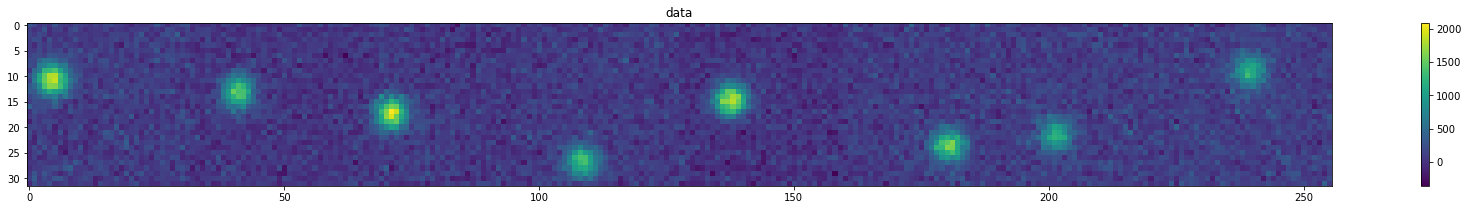

In [4]:
reload(model)
encoder_model = model.IdEncoderModel(len(training_data),
                                    last_out_channels=2)


print(summary(encoder_model, input_size=(128,), row_settings=["var_names"], depth=4))

model.check_model(encoder_model, train_dataloader)

{'x': [<act: Tanh, offset: 0, scaling: 24.0, default: 0, per psf: True, >], 'y': [<act: Tanh, offset: 0, scaling: 24.0, default: 0, per psf: True, >], 'A': [<act: ReLU, offset: 0, scaling: 1000, default: 1, per psf: True, >], 'sig': [<act: ReLU, offset: 2, scaling: 1, default: 5, per psf: True, >], 'bg': [<act: Tanh, offset: 0, scaling: 500, default: 0, per psf: False, >]}
Layer (type (var_name))                  Output Shape              Param #
Gaussian2DModel                          --                        --
├─IdEncoderModel (encoder)               [128, 5, 1, 1]            --
│    └─ModuleDict (encoders)             --                        --
│    │    └─Linear (scale)               [128, 5]                  640
├─Gaussian2DRenderer (renderer)          [128, 1, 32, 32]          --
Total params: 640
Trainable params: 640
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB)

C:\GitHub\smlm-dl\smlm_dl\model.py:743: RuntimeWarning: invalid value encountered in log10
  im = axes[0, i].imshow(np.log10(img[0]))


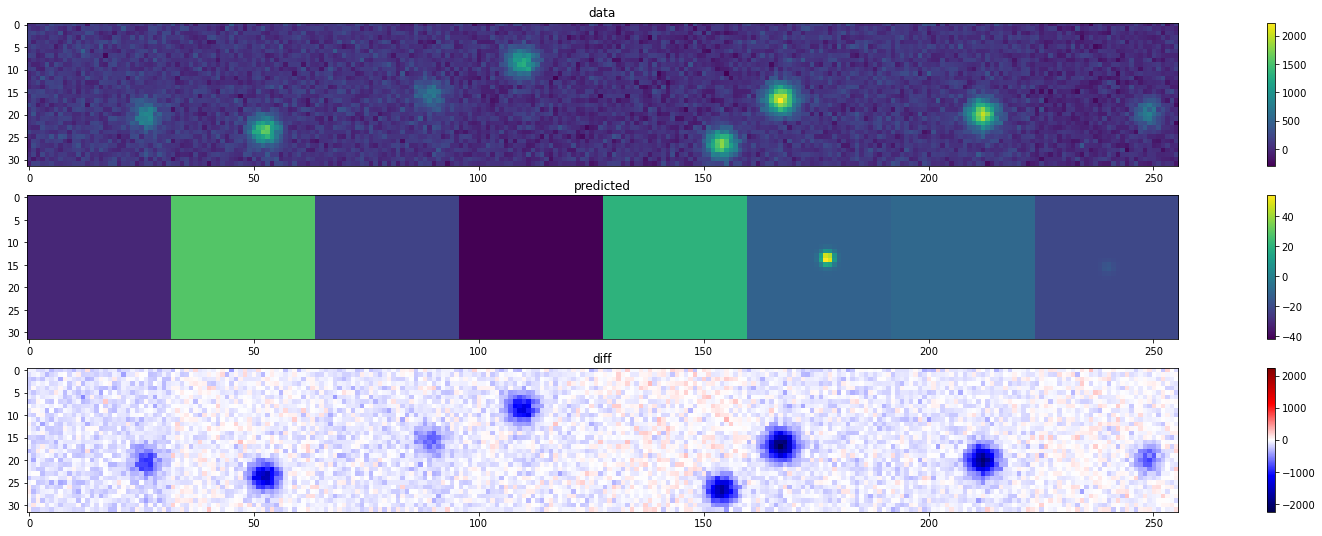

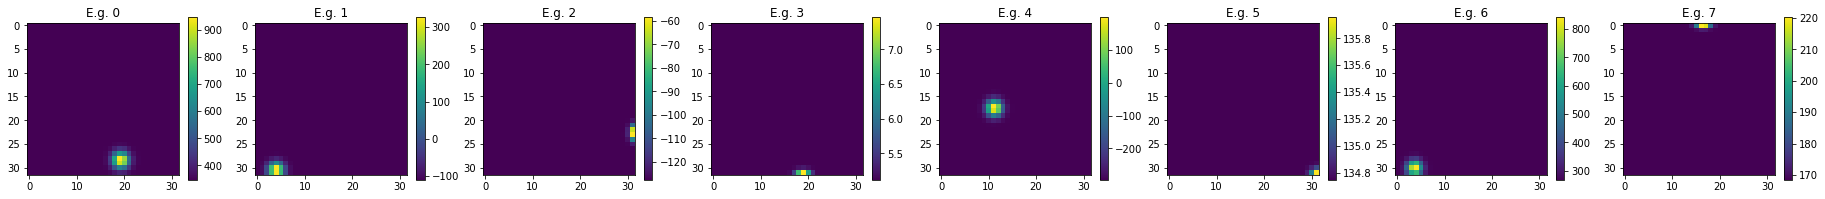

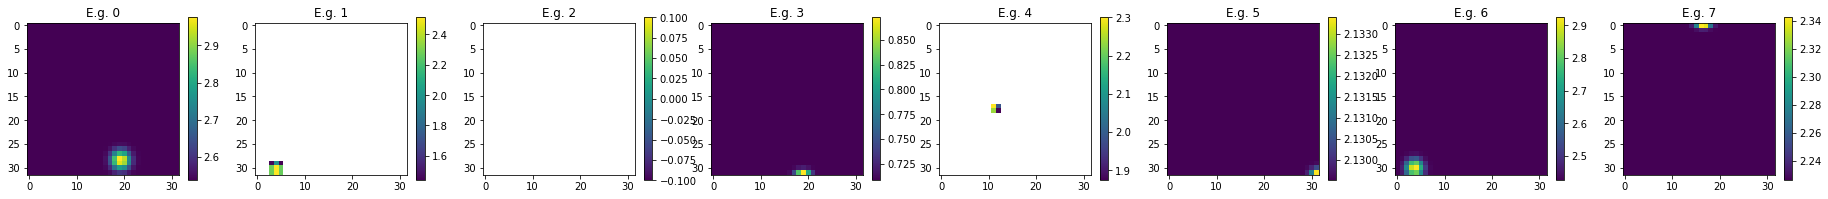

In [5]:
reload(model)

encoder_model = model.Gaussian2DModel(encoder_class=model.IdEncoderModel,
                                      # img_size=(32,32),
                                      fit_params=['x','y','A','sig','bg'],
                                      max_psf_count=1,
                                      encoder_params={"num_img":128,                                                      
                                          # "depth":3,
                                                      # "skip_channels":4,
                                                      # "first_layer_out_channels":16,
                                                     }
                                     )

print(encoder_model.fit_params)


print(summary(encoder_model, input_size=(128,), row_settings=["var_names"], depth=4))

model.check_model(encoder_model, train_dataloader)

{'x': [<act: Tanh, offset: 0, scaling: 24.0, default: 0, per psf: True, >], 'y': [<act: Tanh, offset: 0, scaling: 24.0, default: 0, per psf: True, >], 'A': [<act: ReLU, offset: 0, scaling: 1000, default: 1, per psf: True, >], 'sig': [<act: ReLU, offset: 2, scaling: 1, default: 5, per psf: True, >], 'bg': [<act: Tanh, offset: 0, scaling: 500, default: 0, per psf: False, >]}
Layer (type (var_name))                       Output Shape              Param #
Gaussian2DModel                               --                        --
├─ConvImageEncoderModel (encoder)             [32, 5, 1, 1]             --
│    └─ModuleDict (skips)                     --                        --
│    │    └─Sequential (skip_conv_layer0)     [32, 4, 1, 1]             --
│    │    │    └─GroupNorm (0)                [32, 1, 32, 32]           2
│    │    │    └─Conv2d (1)                   [32, 4, 1, 1]             4,100
│    │    │    └─ReLU (2)                     [32, 4, 1, 1]             --
│    │    │    └─

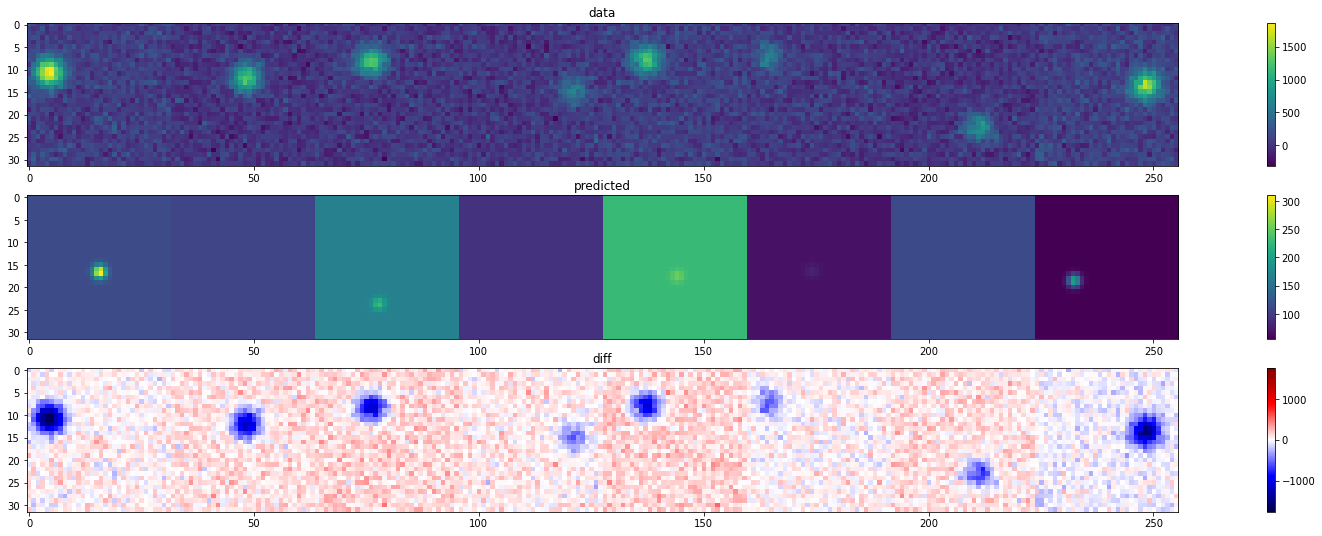

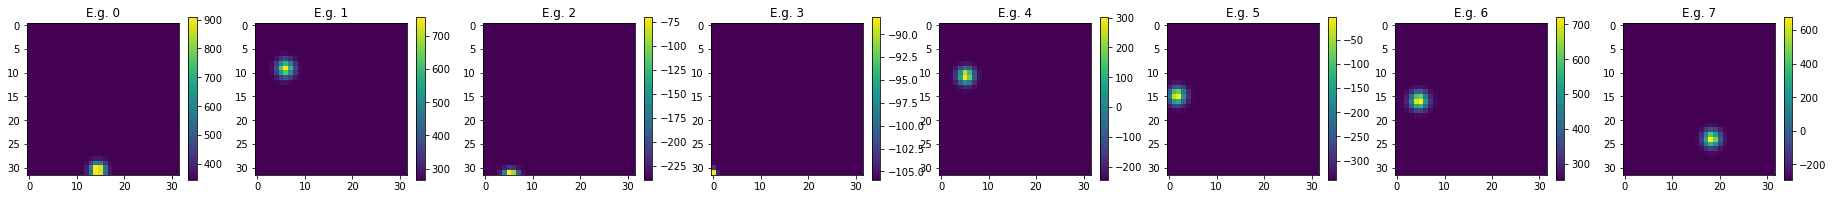

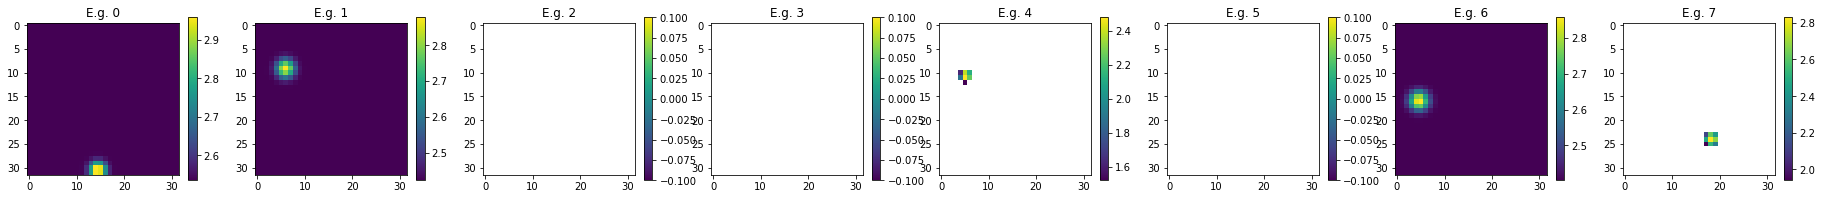

In [6]:
reload(model)

encoder_model = model.Gaussian2DModel(img_size=(32,32),
                                      fit_params=['x','y','A','sig','bg'],
                                      max_psf_count=1,
                                      encoder_params={"depth":3,
                                                      "skip_channels":4,
                                                      # "first_layer_out_channels":16,
                                                     })

print(encoder_model.fit_params)


print(summary(encoder_model, input_size=(32, 1, 32, 32), row_settings=["var_names"], depth=4))

model.check_model(encoder_model, train_dataloader)

Layer (type (var_name))                       Output Shape              Param #
Gaussian2DModel                               --                        --
├─ConvImageEncoderModel (encoder)             [32, 13, 1, 1]            --
│    └─ModuleDict (encoders)                  --                        --
│    │    └─Sequential (conv_layer0)          [32, 16, 16, 16]          --
│    │    │    └─Conv2d (0)                   [32, 16, 32, 32]          160
│    │    │    └─ReLU (1)                     [32, 16, 32, 32]          --
│    │    │    └─Conv2d (2)                   [32, 16, 32, 32]          2,320
│    │    │    └─ReLU (3)                     [32, 16, 32, 32]          --
│    │    │    └─MaxPool2d (4)                [32, 16, 16, 16]          --
│    │    │    └─Dropout2d (5)                [32, 16, 16, 16]          --
│    │    └─Sequential (conv_layer1)          [32, 32, 8, 8]            --
│    │    │    └─Conv2d (0)                   [32, 32, 16, 16]          4,640
│    │    │  

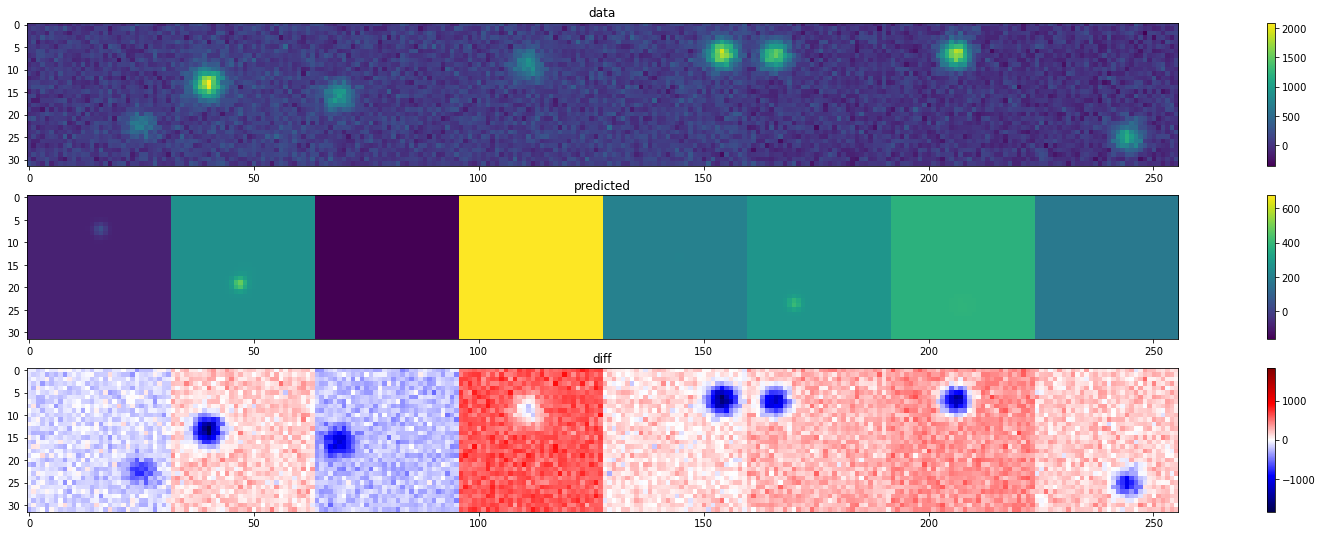

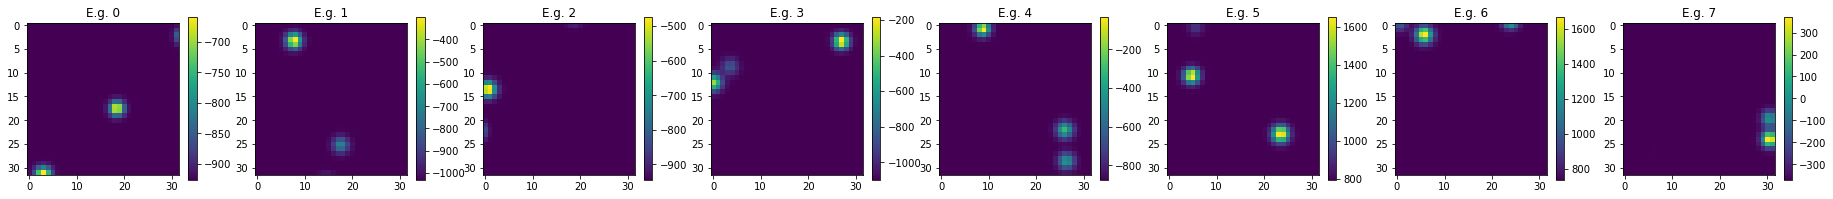

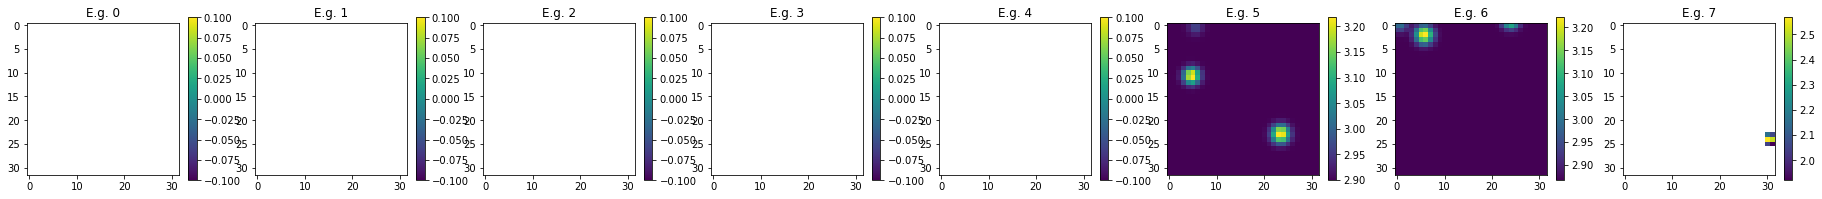

In [7]:
reload(model)

encoder_model = model.Gaussian2DModel(fit_params=['x','y','A','sig','bg'],
                                      max_psf_count=3,
                                      encoder_params={"depth":3, "first_layer_out_channels":16,},
                                      )
print(summary(encoder_model, input_size=(32, 1, 32, 32), row_settings=["var_names"], depth=4))

model.check_model(encoder_model, train_dataloader)

Layer (type (var_name))                       Output Shape              Param #
Template2DModel                               --                        --
├─ConvImageEncoderModel (encoder)             [32, 4, 1, 1]             --
│    └─ModuleDict (encoders)                  --                        --
│    │    └─Sequential (conv_layer0)          [32, 16, 16, 16]          --
│    │    │    └─Conv2d (0)                   [32, 16, 32, 32]          160
│    │    │    └─ReLU (1)                     [32, 16, 32, 32]          --
│    │    │    └─Conv2d (2)                   [32, 16, 32, 32]          2,320
│    │    │    └─ReLU (3)                     [32, 16, 32, 32]          --
│    │    │    └─MaxPool2d (4)                [32, 16, 16, 16]          --
│    │    │    └─Dropout2d (5)                [32, 16, 16, 16]          --
│    │    └─Sequential (conv_layer1)          [32, 32, 8, 8]            --
│    │    │    └─Conv2d (0)                   [32, 32, 16, 16]          4,640
│    │    │  

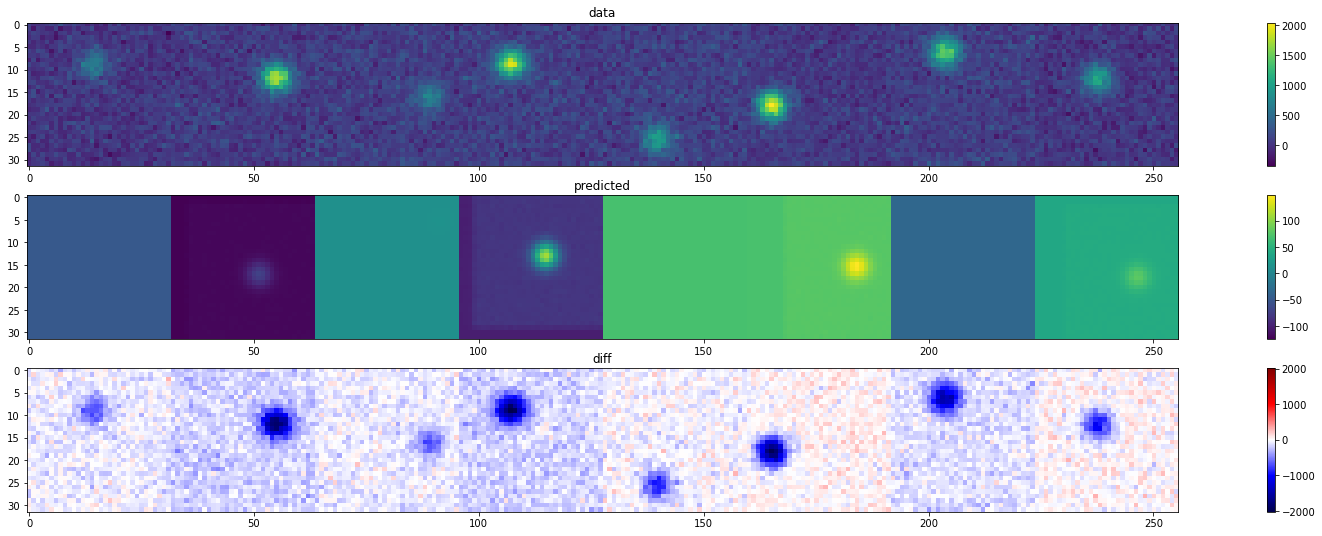

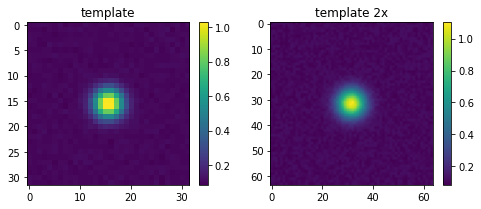

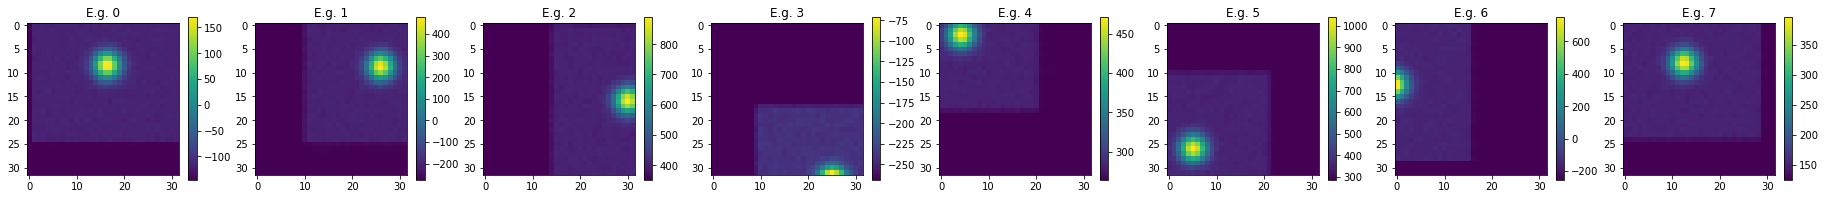

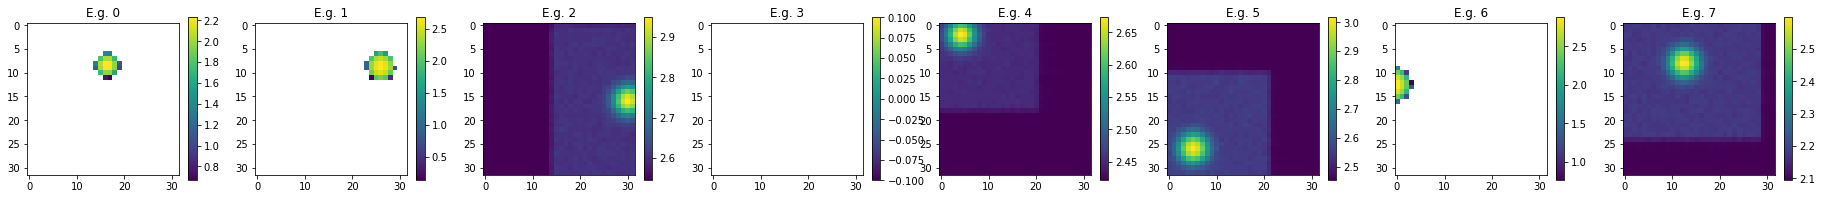

In [8]:
reload(model)

encoder_model = model.Template2DModel(fit_params=['x','y','A','bg'],
                                     )
print(summary(encoder_model, input_size=(32, 1, 32, 32), row_settings=["var_names"], depth=4))

model.check_model(encoder_model, train_dataloader)

Layer (type (var_name))                       Output Shape              Param #
Template2DModel                               --                        --
├─Template2DRenderer (renderer)               --                        --
│    └─Sequential (template)                  [64, 64]                  --
│    │    └─ParameterModule (0)               [64, 64]                  4,096
│    │    └─ReLU (1)                          [64, 64]                  --
│    └─AvgPool2d (template_pooling)           [1, 1, 32, 32]            --
├─DirectConcatFeedbackModel (feedbacker)      [32, 2, 32, 32]           --
│    └─GroupNorm (norm)                       [32, 1, 32, 32]           2
├─ConvImageEncoderModel (encoder)             [32, 4, 1, 1]             --
│    └─ModuleDict (encoders)                  --                        --
│    │    └─Sequential (conv_layer0)          [32, 16, 16, 16]          --
│    │    │    └─Conv2d (0)                   [32, 16, 32, 32]          304
│    │    │    └─

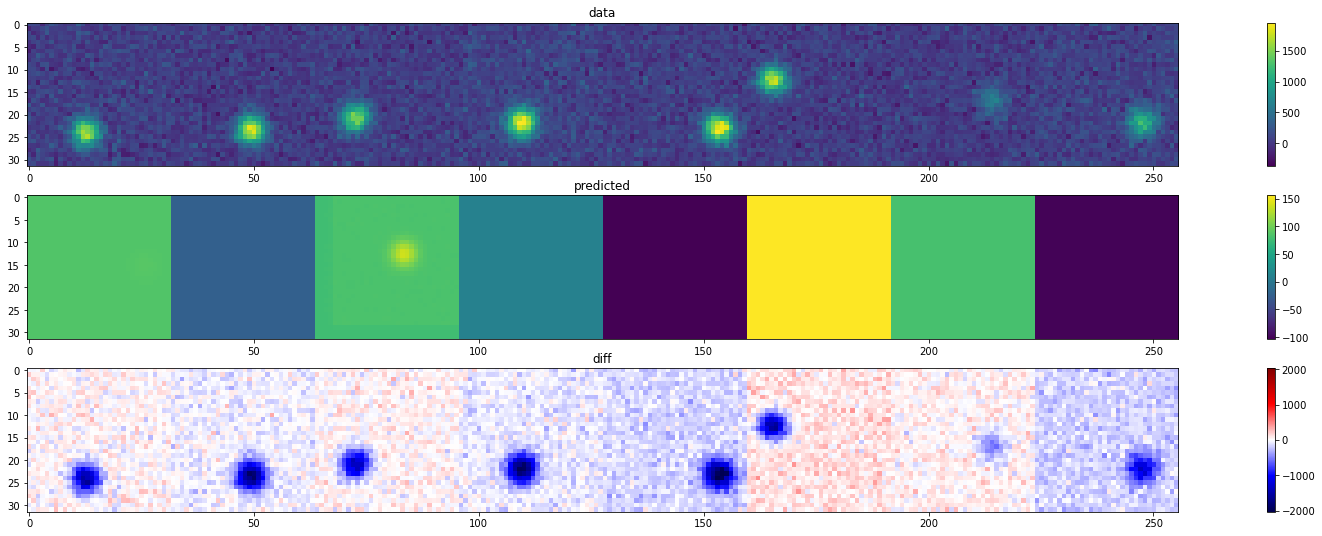

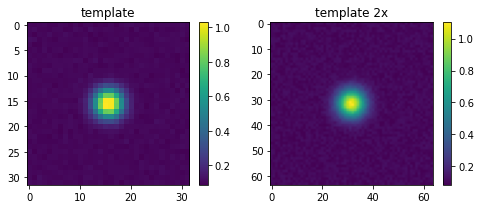

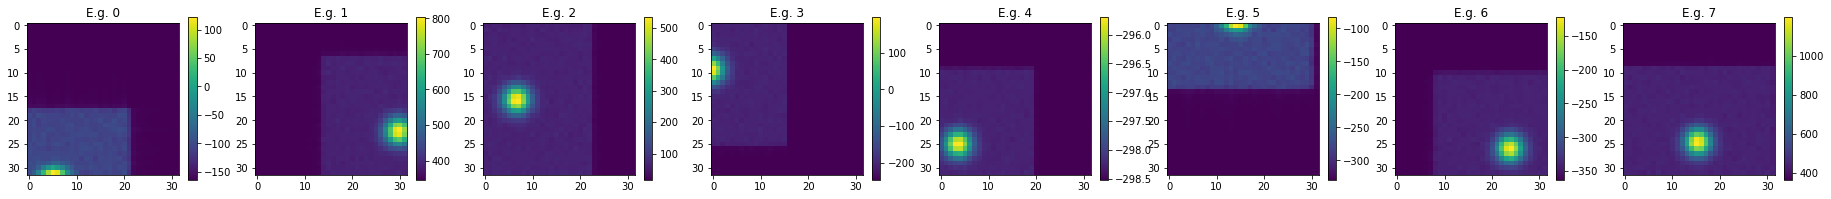

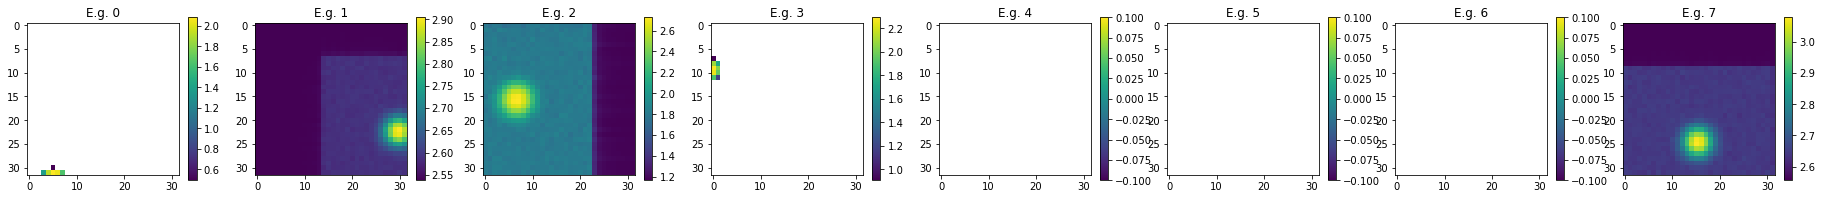

In [9]:
reload(model)

encoder_model = model.Template2DModel(feedback_class=model.DirectConcatFeedbackModel,
                                      fit_params=['x','y','A','bg'],
                                      encoder_params={"depth":3, "first_layer_out_channels":16,},
                                     )
print(summary(encoder_model, input_size=(32, 1, 32, 32), row_settings=["var_names"], depth=4))

model.check_model(encoder_model, train_dataloader)

Layer (type (var_name))                       Output Shape              Param #
Template2DModel                               --                        --
├─ConvImageEncoderModel (encoder)             [32, 10, 1, 1]            --
│    └─ModuleDict (encoders)                  --                        --
│    │    └─Sequential (conv_layer0)          [32, 16, 16, 16]          --
│    │    │    └─Conv2d (0)                   [32, 16, 32, 32]          160
│    │    │    └─ReLU (1)                     [32, 16, 32, 32]          --
│    │    │    └─Conv2d (2)                   [32, 16, 32, 32]          2,320
│    │    │    └─ReLU (3)                     [32, 16, 32, 32]          --
│    │    │    └─MaxPool2d (4)                [32, 16, 16, 16]          --
│    │    │    └─Dropout2d (5)                [32, 16, 16, 16]          --
│    │    └─Sequential (conv_layer1)          [32, 32, 8, 8]            --
│    │    │    └─Conv2d (0)                   [32, 32, 16, 16]          4,640
│    │    │  

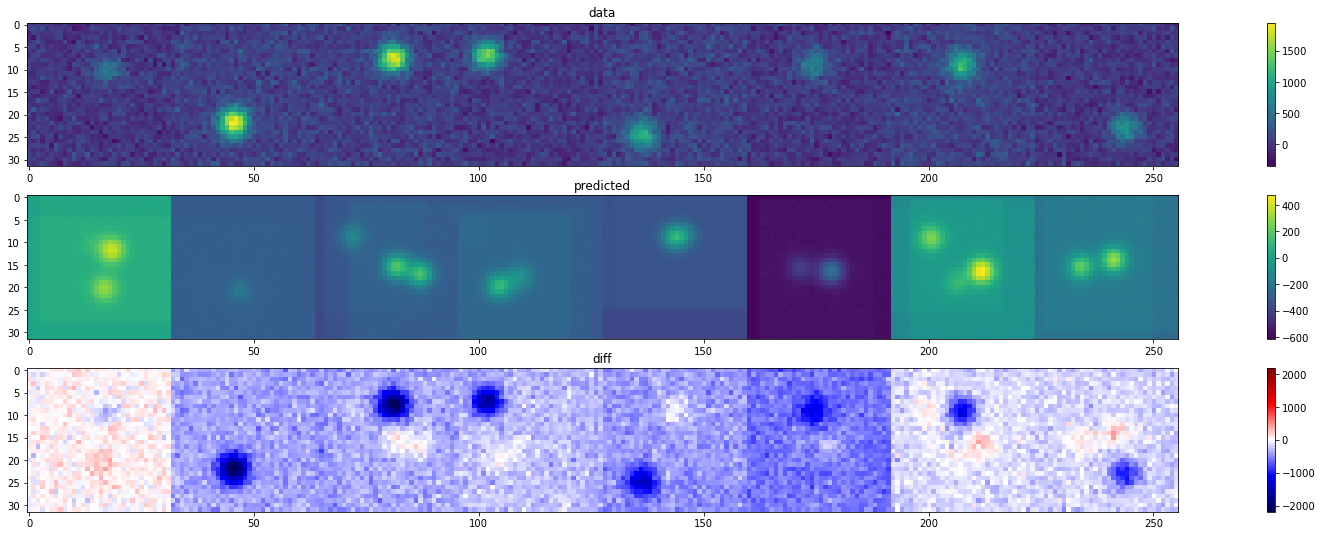

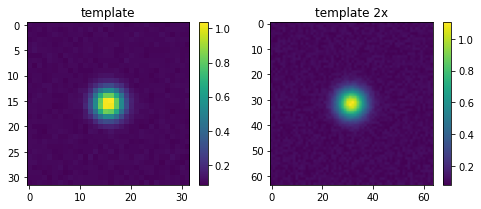

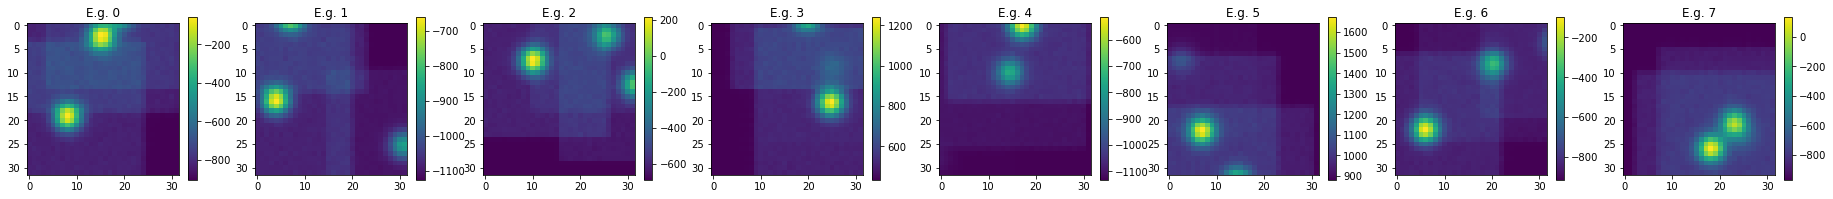

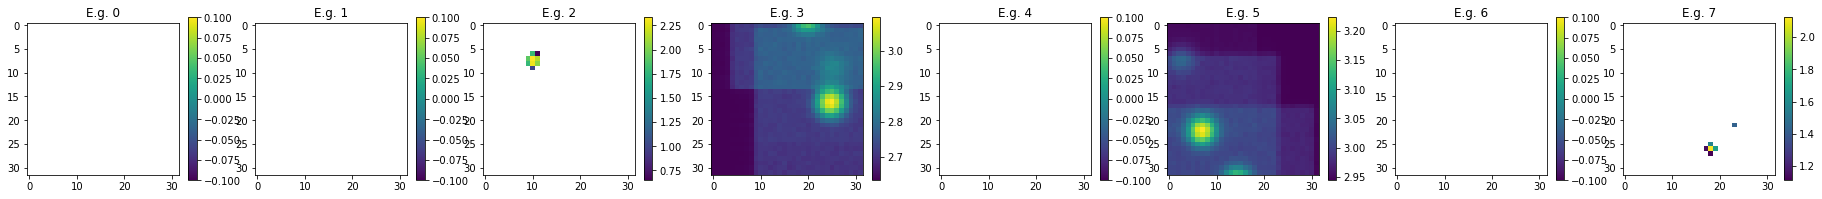

In [10]:
reload(model)


encoder_model = model.Template2DModel(fit_params=['x','y','A','bg',],
                                      max_psf_count=3,
                                      encoder_params={"depth":3, "first_layer_out_channels":16,},)
print(summary(encoder_model, input_size=(32, 1, 32, 32), row_settings=["var_names"], depth=4))

model.check_model(encoder_model, train_dataloader)

input shape: (32, 1, 32, 32), output_shape: (32, 1, 32, 32)


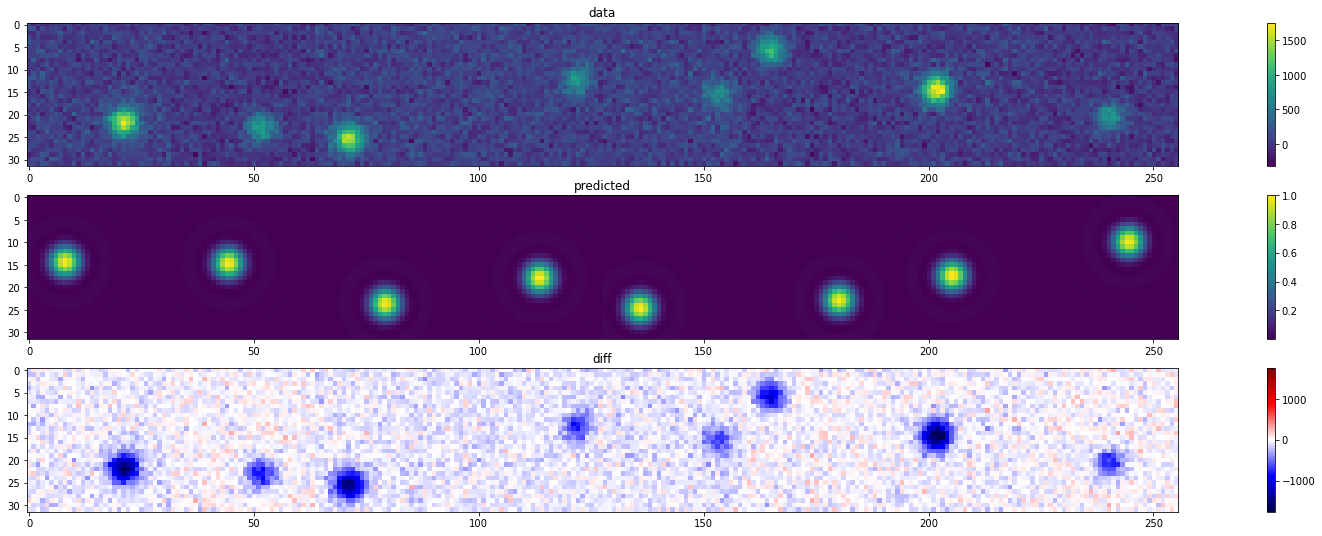

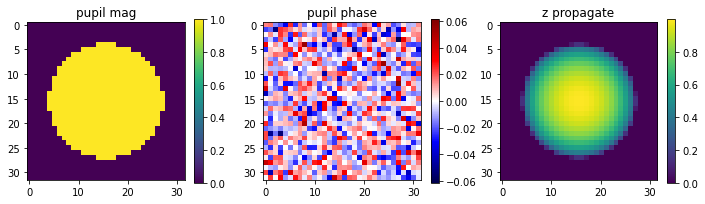

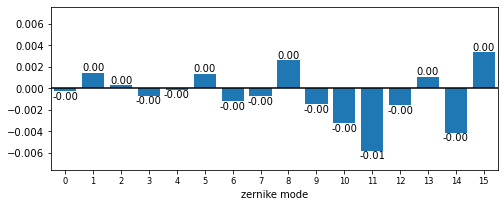

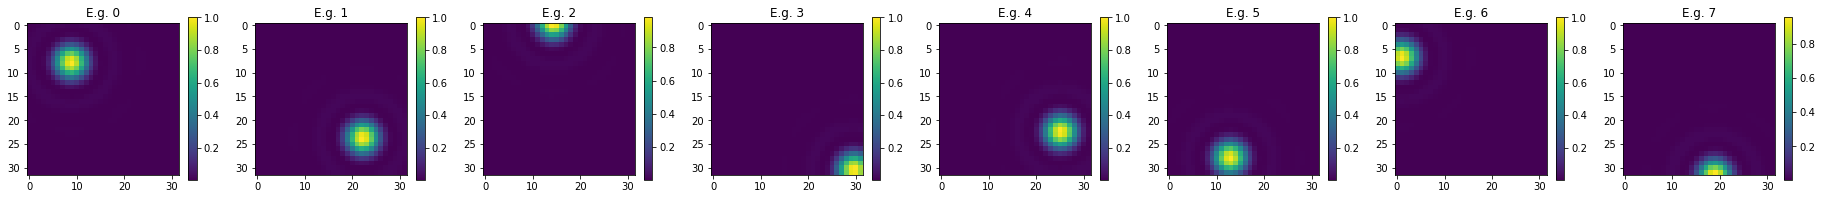

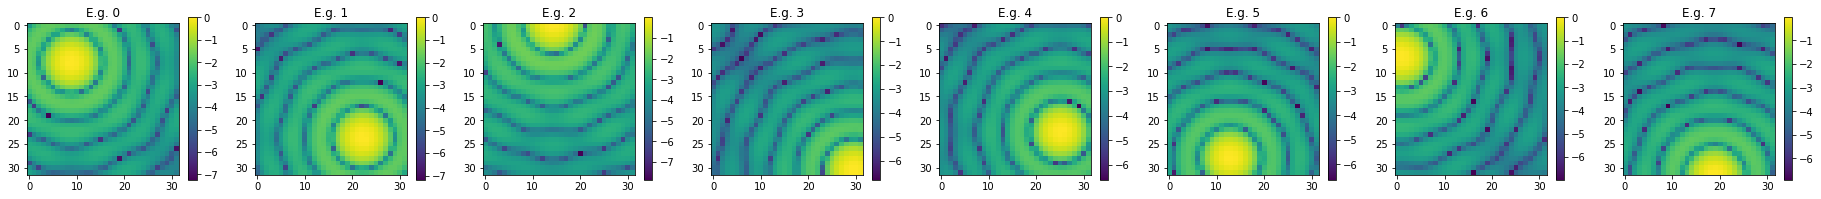

In [11]:
reload(model)

encoder_model = model.FourierOptics2DModel(fit_params=['x','y',],
                                           renderer_params={"pupil_params":{'scale':0.75, 'apod':False}},
                                           # normalize=False,
                                           encoder_params={"depth":3, "first_layer_out_channels":16,},
                                          )
# print(summary(encoder_model, input_size=(1024, 1, 32, 32), row_settings=["var_names"],))

model.check_model(encoder_model, train_dataloader)

Layer (type (var_name))                       Output Shape              Param #
FourierOptics2DModel                          --                        --
├─ConvImageEncoderModel (encoder)             [1024, 6, 1, 1]           --
│    └─ModuleDict (encoders)                  --                        --
│    │    └─Sequential (conv_layer0)          [1024, 16, 16, 16]        --
│    │    │    └─Conv2d (0)                   [1024, 16, 32, 32]        160
│    │    │    └─ReLU (1)                     [1024, 16, 32, 32]        --
│    │    │    └─Conv2d (2)                   [1024, 16, 32, 32]        2,320
│    │    │    └─ReLU (3)                     [1024, 16, 32, 32]        --
│    │    │    └─MaxPool2d (4)                [1024, 16, 16, 16]        --
│    │    │    └─Dropout2d (5)                [1024, 16, 16, 16]        --
│    │    └─Sequential (conv_layer1)          [1024, 32, 8, 8]          --
│    │    │    └─Conv2d (0)                   [1024, 32, 16, 16]        4,640
│    │    │  

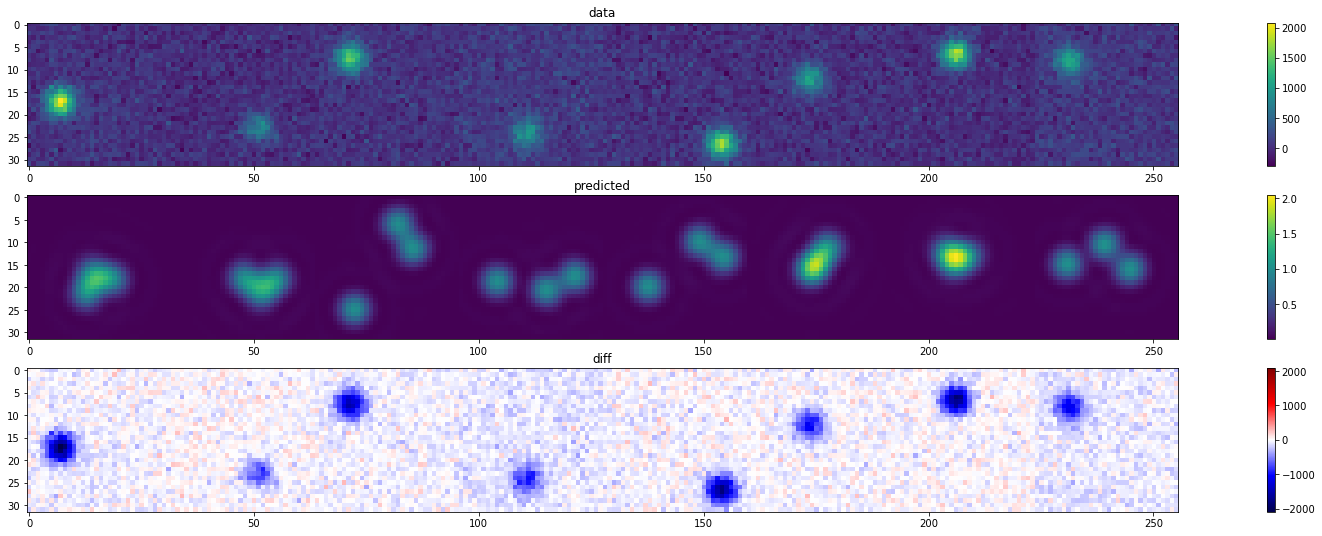

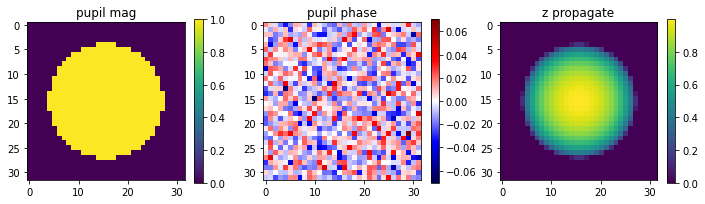

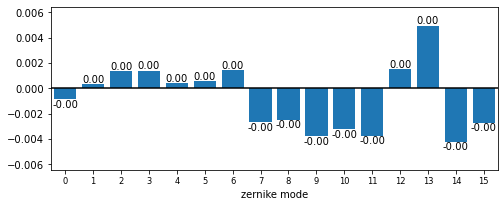

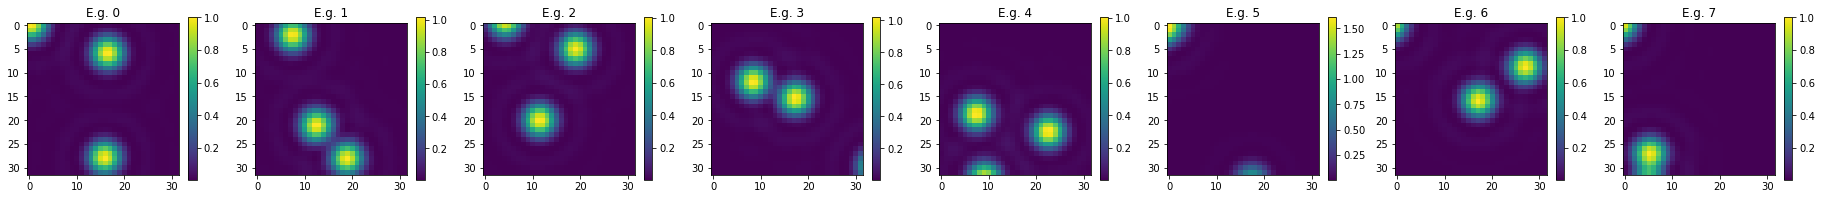

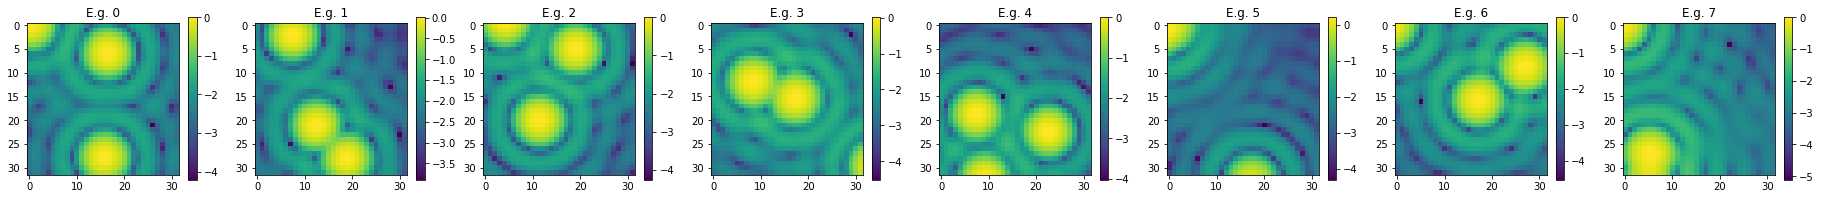

In [12]:
reload(model)

encoder_model = model.FourierOptics2DModel(fit_params=['x','y',], max_psf_count=3,
                                           encoder_params={"depth":3, "first_layer_out_channels":16,},)
print(summary(encoder_model, input_size=(1024, 1, 32, 32), row_settings=["var_names"], depth=4))

model.check_model(encoder_model, train_dataloader)

Layer (type (var_name))                       Output Shape              Param #
FourierOptics2DModel                          --                        --
├─ConvImageEncoderModel (encoder)             [1024, 5, 1, 1]           --
│    └─ModuleDict (encoders)                  --                        --
│    │    └─Sequential (conv_layer0)          [1024, 16, 16, 16]        --
│    │    │    └─Conv2d (0)                   [1024, 16, 32, 32]        160
│    │    │    └─ReLU (1)                     [1024, 16, 32, 32]        --
│    │    │    └─Conv2d (2)                   [1024, 16, 32, 32]        2,320
│    │    │    └─ReLU (3)                     [1024, 16, 32, 32]        --
│    │    │    └─MaxPool2d (4)                [1024, 16, 16, 16]        --
│    │    │    └─Dropout2d (5)                [1024, 16, 16, 16]        --
│    │    └─Sequential (conv_layer1)          [1024, 32, 8, 8]          --
│    │    │    └─Conv2d (0)                   [1024, 32, 16, 16]        4,640
│    │    │  

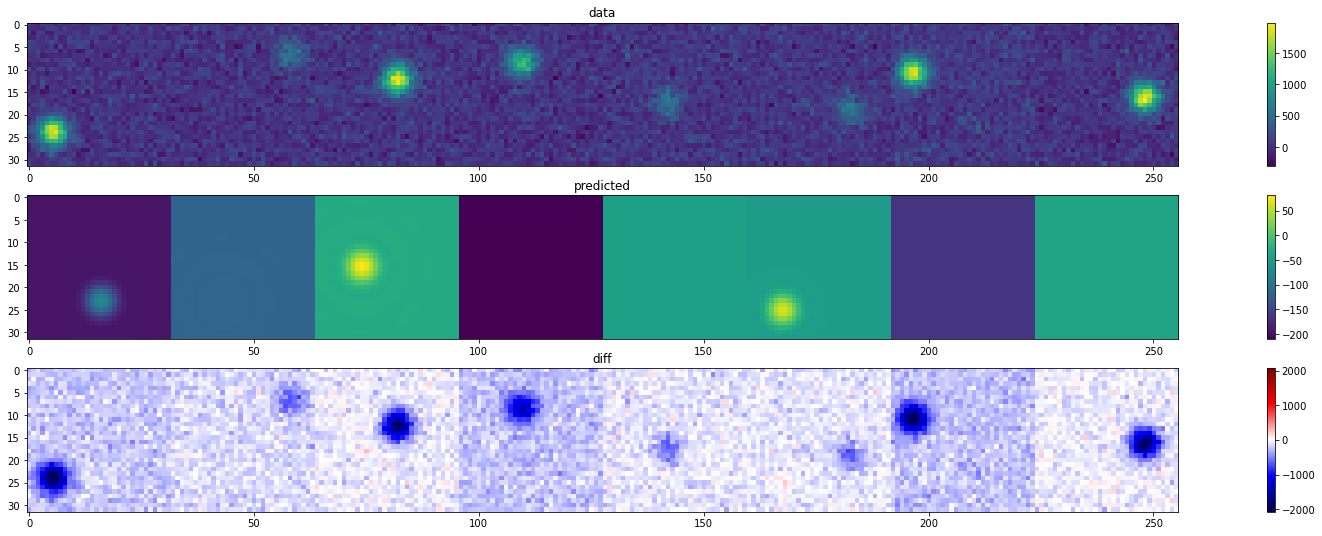

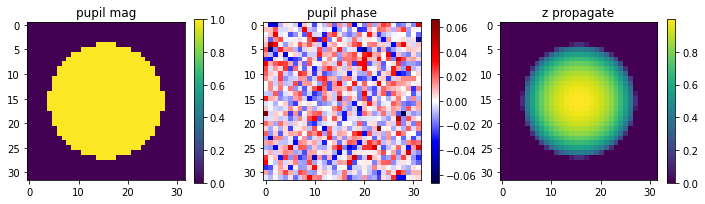

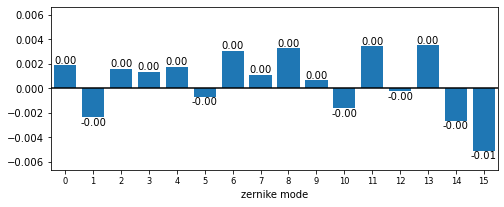

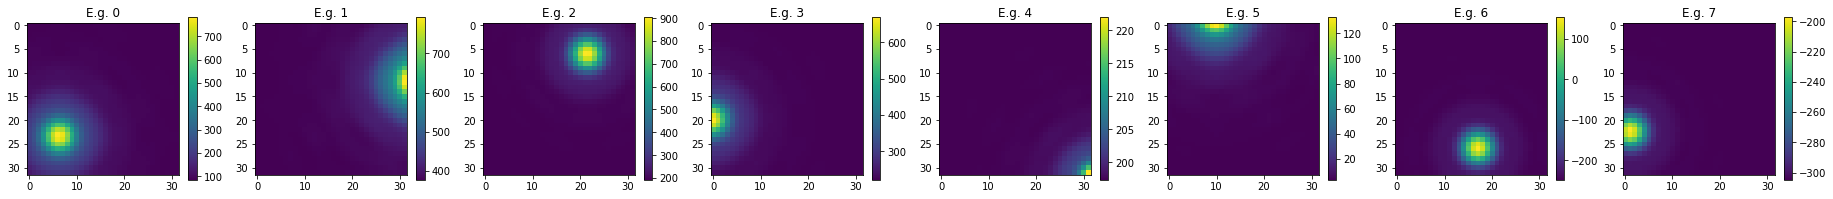

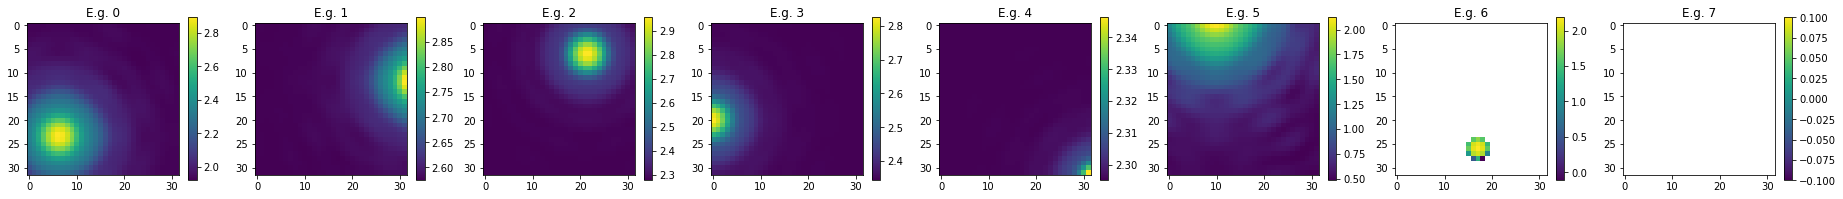

In [13]:
reload(model)

encoder_model = model.FourierOptics2DModel(fit_params=['x','y','z','bg','A'], max_psf_count=1,
                                           # normalize=False,
                                           encoder_params={"depth":3, "first_layer_out_channels":16,},)
print(summary(encoder_model, input_size=(1024, 1, 32, 32), row_settings=["var_names"], depth=4))

model.check_model(encoder_model, train_dataloader)


Layer (type (var_name))                       Output Shape              Param #
FourierOptics2DModel                          --                        --
├─FourierOptics2DRenderer (renderer)          --                        --
│    └─Sequential (pupil_phase)               [32, 32]                  --
│    │    └─ParameterModule (0)               [32, 32]                  1,024
│    │    └─Identity (1)                      [32, 32]                  --
│    │    └─Dropout (2)                       [32, 32]                  --
├─DirectConcatFeedbackModel (feedbacker)      [128, 4, 32, 32]          --
│    └─GroupNorm (norm)                       [128, 1, 32, 32]          2
├─ConvImageEncoderModel (encoder)             [128, 5, 1, 1]            --
│    └─ModuleDict (encoders)                  --                        --
│    │    └─Sequential (conv_layer0)          [128, 16, 16, 16]         --
│    │    │    └─Conv2d (0)                   [128, 16, 32, 32]         592
│    │    │    └─

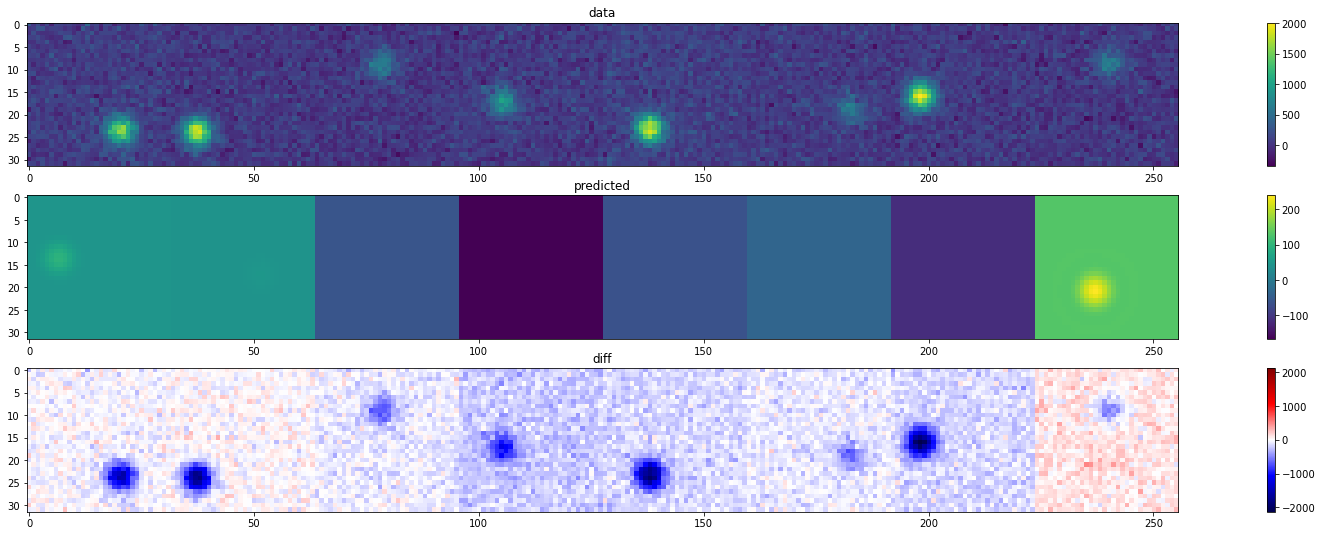

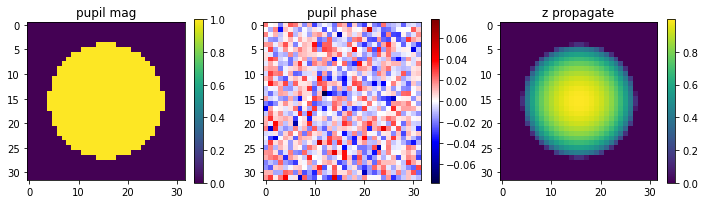

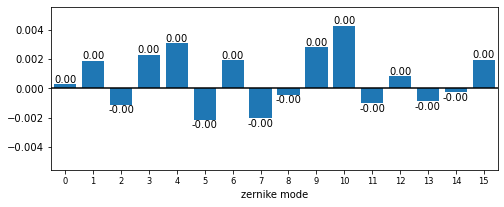

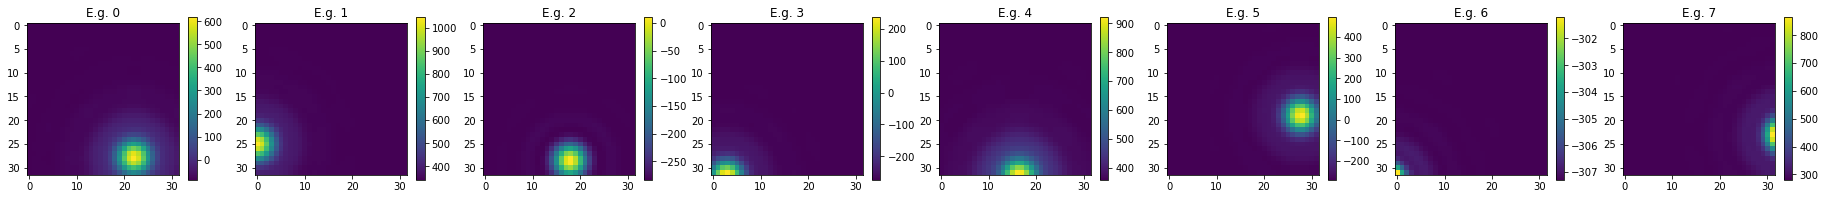

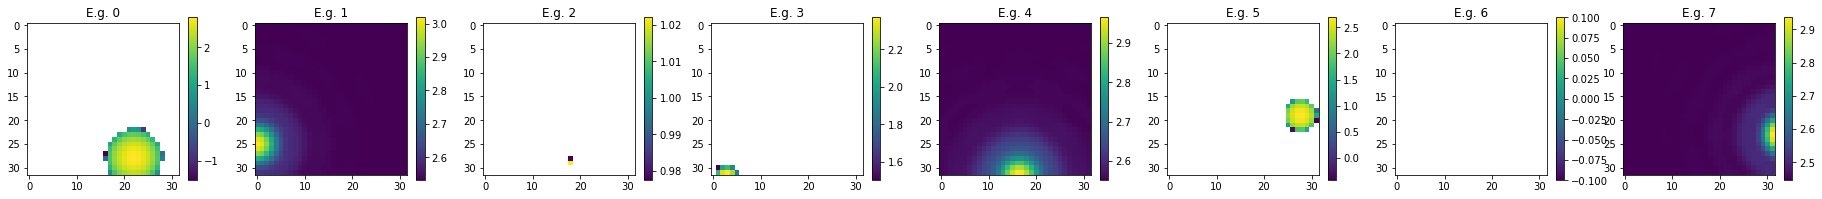

In [14]:
reload(model)

encoder_model = model.FourierOptics2DModel(feedback_class=model.DirectConcatFeedbackModel,
                                           fit_params=['x','y','z','bg','A'], max_psf_count=1,
                                           # normalize=False,
                                           encoder_params={"depth":3, "first_layer_out_channels":16,},)
print(summary(encoder_model, input_size=(128, 1, 32, 32), row_settings=["var_names"], depth=4))

model.check_model(encoder_model, train_dataloader)


Layer (type (var_name))                       Output Shape              Param #
FourierOptics2DModel                          --                        --
├─FourierOptics2DRenderer (renderer)          --                        --
│    └─Sequential (pupil_phase)               [32, 32]                  --
│    │    └─ParameterModule (0)               [32, 32]                  1,024
│    │    └─Identity (1)                      [32, 32]                  --
│    │    └─Dropout (2)                       [32, 32]                  --
├─DenseFeedbackModel (feedbacker)             [128, 4, 32, 32]          --
│    └─ModuleDict (feedback)                  --                        --
│    │    └─Sequential (dense_layer_0)        [1, 3, 32, 32]            --
│    │    │    └─GroupNorm (0)                [1, 3, 32, 32]            6
│    │    │    └─Linear (1)                   [1, 3, 32, 32]            1,056
│    │    │    └─ReLU (2)                     [1, 3, 32, 32]            --
│    │    │    

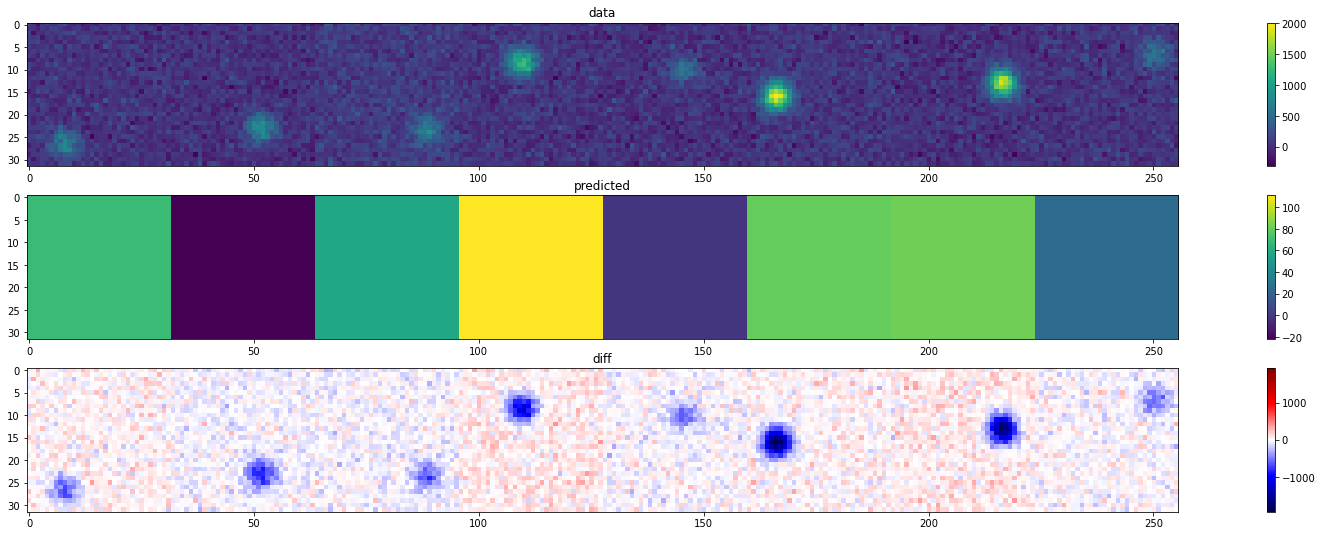

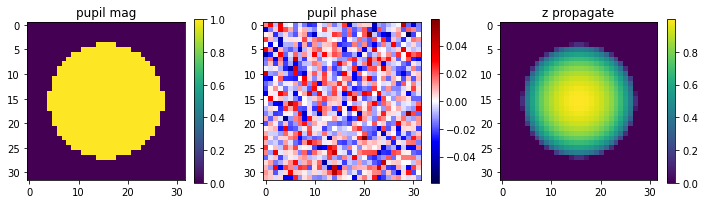

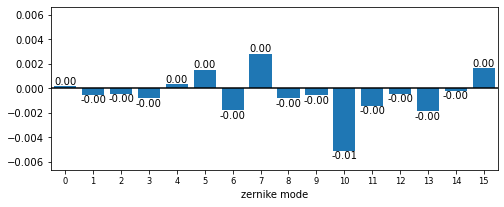

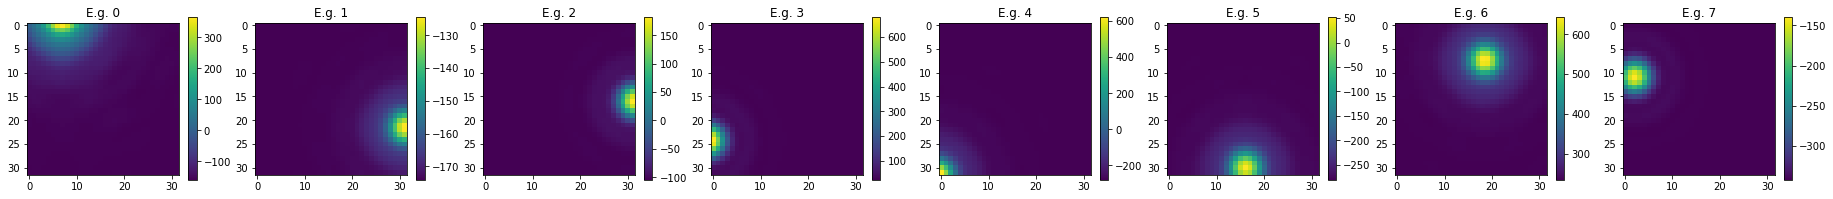

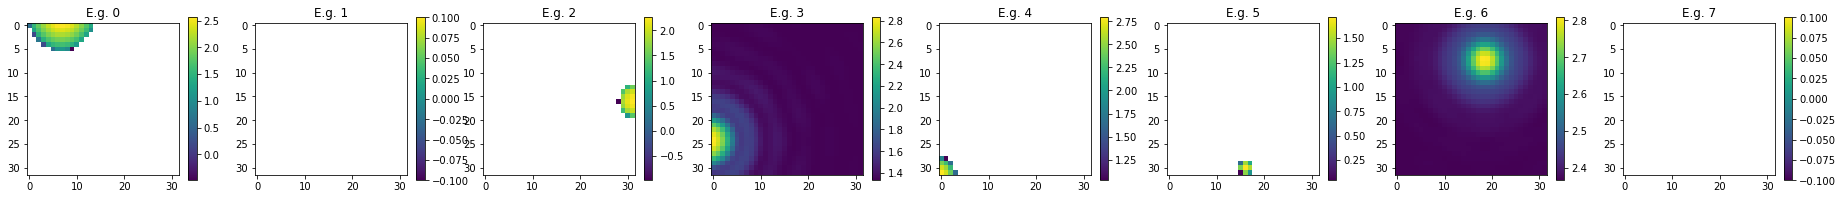

In [15]:
reload(model)

encoder_model = model.FourierOptics2DModel(feedback_class=model.DenseFeedbackModel,
                                           fit_params=['x','y','z','bg','A'], max_psf_count=1,
                                           # normalize=False,
                                           encoder_params={"depth":3, "first_layer_out_channels":16,},)
print(summary(encoder_model, input_size=(128, 1, 32, 32), row_settings=["var_names"], depth=4))

model.check_model(encoder_model, train_dataloader)


Image parameters settings: {'A': [0.5, 2.0], 'bg': [0, 10], 'x': [-5, 5], 'y': [-5, 5], 'data': array([[ 8,  9,  9, ..., 14, 15, 14],
       [ 9,  7,  9, ..., 16, 15, 14],
       [ 8,  8,  9, ..., 14, 16, 15],
       ...,
       [88, 95, 82, ..., 17, 24, 59],
       [92, 98, 92, ..., 17, 22, 55],
       [95, 93, 86, ..., 16, 18, 38]], dtype=uint8)}
4:	 [id = 4.000,], [A = 1.508,], [bg = 0.739,], [x = -0.121,], [y = 0.609,], [z = 0.000,],
0:	 [id = 0.000,], [A = 1.093,], [bg = 7.001,], [x = 4.870,], [y = -0.777,], [z = 0.000,],
5:	 [id = 5.000,], [A = 1.323,], [bg = 3.158,], [x = -1.943,], [y = -4.321,], [z = 0.000,],
7:	 [id = 7.000,], [A = 0.584,], [bg = 2.316,], [x = 4.374,], [y = -2.289,], [z = 0.000,],
1:	 [id = 1.000,], [A = 1.088,], [bg = 1.805,], [x = -2.544,], [y = 0.563,], [z = 0.000,],
2:	 [id = 2.000,], [A = 1.559,], [bg = 3.291,], [x = -3.032,], [y = -3.949,], [z = 0.000,],
6:	 [id = 6.000,], [A = 1.227,], [bg = 5.799,], [x = -0.607,], [y = -3.522,], [z = 0.000,],
3:	 [id =

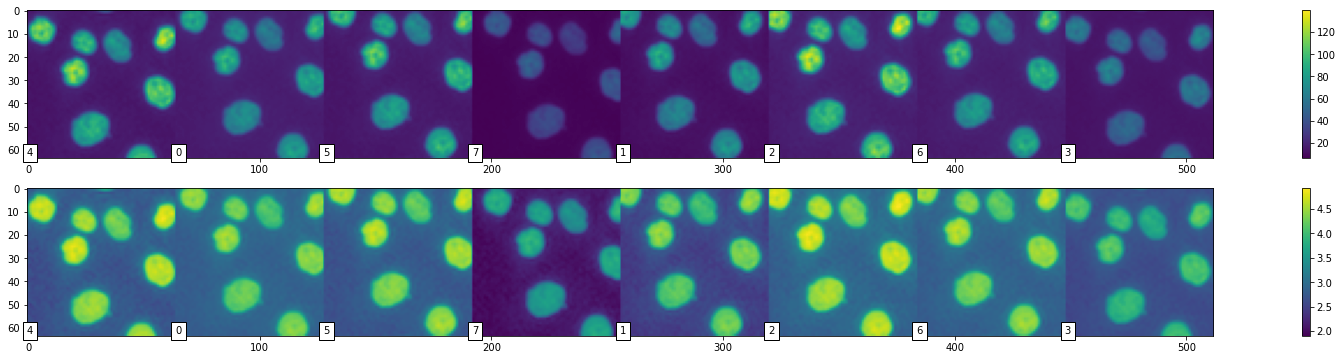

In [16]:
reload(dataset)
image_training_data = dataset.SingleImageDataset(skimage.data.human_mitosis()[20:, 20:],
                                                 out_size=(64,64),                                                 
                                                 length=8,
                                                 image_params={'x':[-5, 5], 'y':[-5,5]},
                                                 noise_params={},
                                                 augmentations={},
                                                 normalize=False
                                                )
dataset.inspect_images(image_training_data)

train_image_dataloader = DataLoader(image_training_data,
                                    batch_size=32, shuffle=True)
# print(image_training_data[1][0].shape)

dd = next(iter(train_image_dataloader))
# print(dd[0].shape, dd[1])

input shape: (8, 1, 64, 64), output_shape: (8, 1, 64, 64)


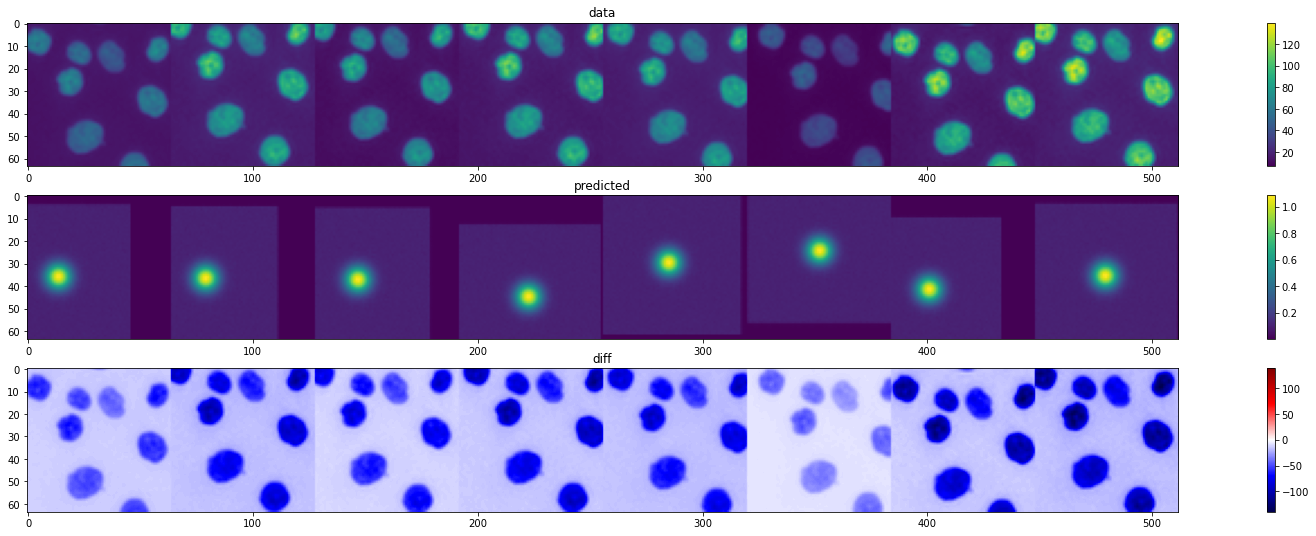

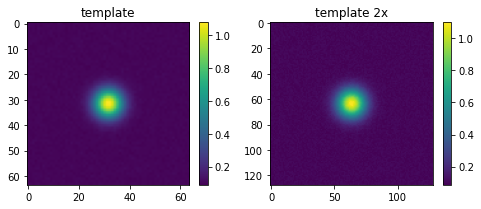

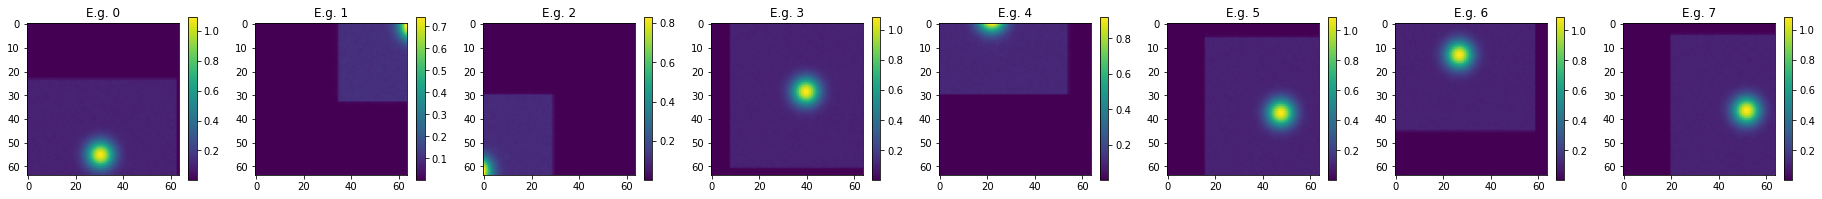

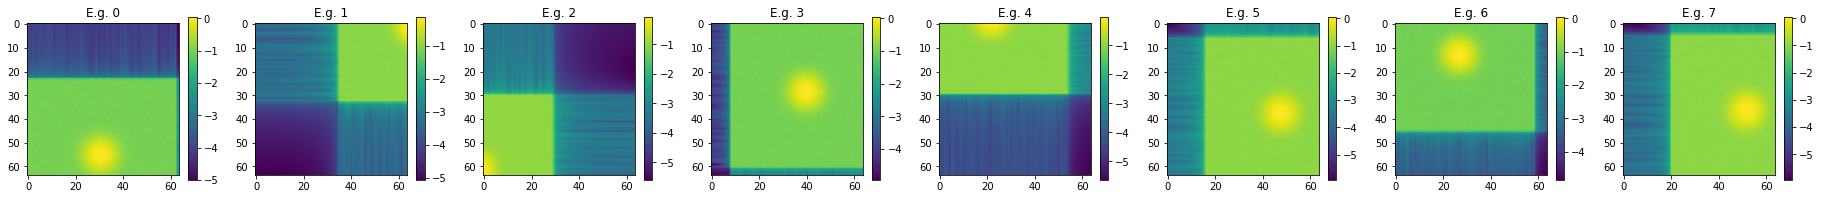

In [17]:
reload(model)

encoder_model = model.Template2DModel(img_size=(64,64),
                                      fit_params=['x','y'],
                                      # max_psf_count=3,
                                      encoder_params={"depth":3, "first_layer_out_channels":16,},)
# print(summary(encoder_model, input_size=(8, 1, 64, 64), row_settings=["var_names"],))

model.check_model(encoder_model, train_image_dataloader)

(1, 64, 64)
input shape: (8, 1, 64, 64), output_shape: (8, 1, 64, 64)


C:\GitHub\smlm-dl\smlm_dl\model.py:488: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if template_init is None or template_init == 'gauss':


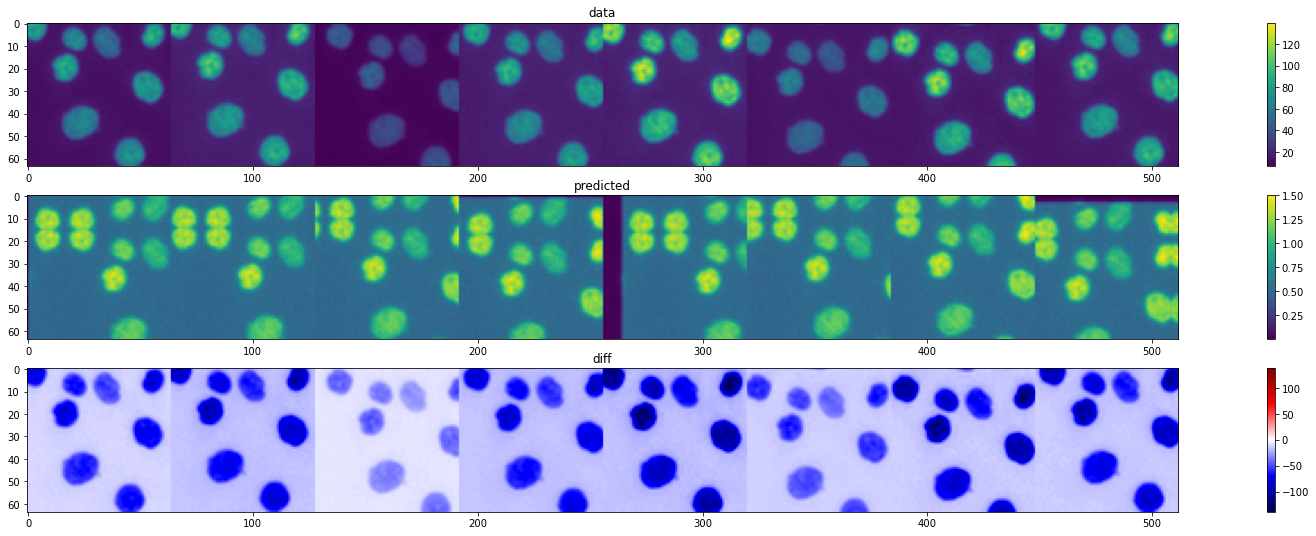

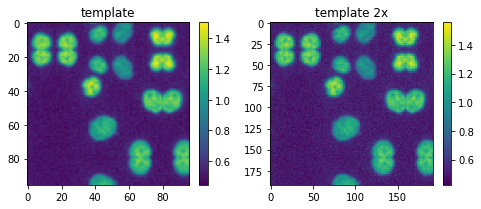

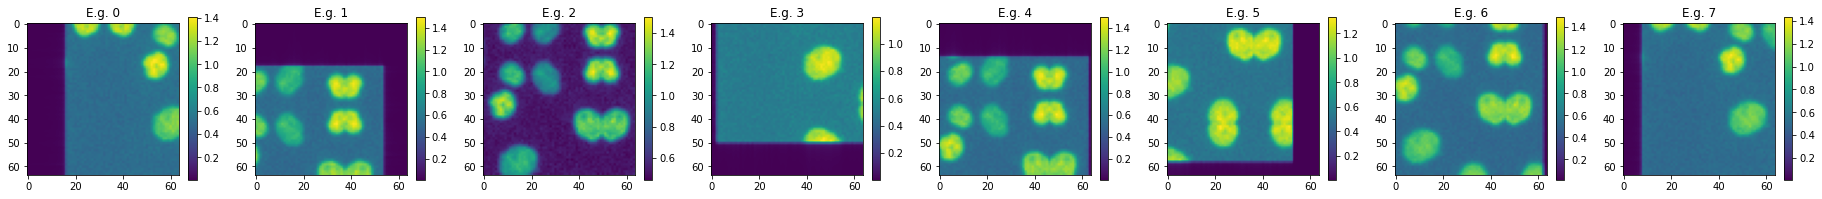

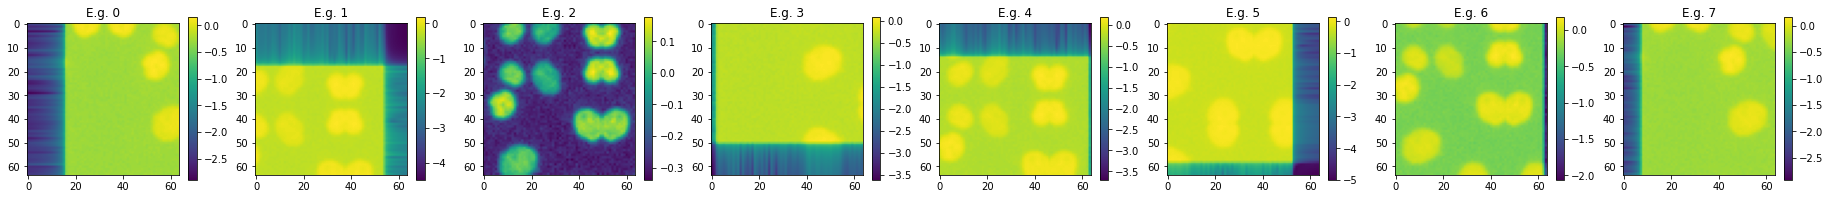

In [18]:
reload(model)
print(train_image_dataloader.dataset[0][0].shape)
encoder_model = model.Template2DModel(img_size=(64,64),
                                      fit_params=['x','y'],
                                      # max_psf_count=3,
                                      renderer_params={"template_init":train_image_dataloader.dataset[0][0].mean(0),
                                                       "template_padding":(16,16)},
                                      encoder_params={"depth":4, "first_layer_out_channels":16,},)
# print(summary(encoder_model, input_size=(8, 1, 64, 64), row_settings=["var_names"],))

model.check_model(encoder_model, train_image_dataloader)

(1, 64, 64)
input shape: (8, 1, 64, 64), output_shape: (8, 1, 64, 64)


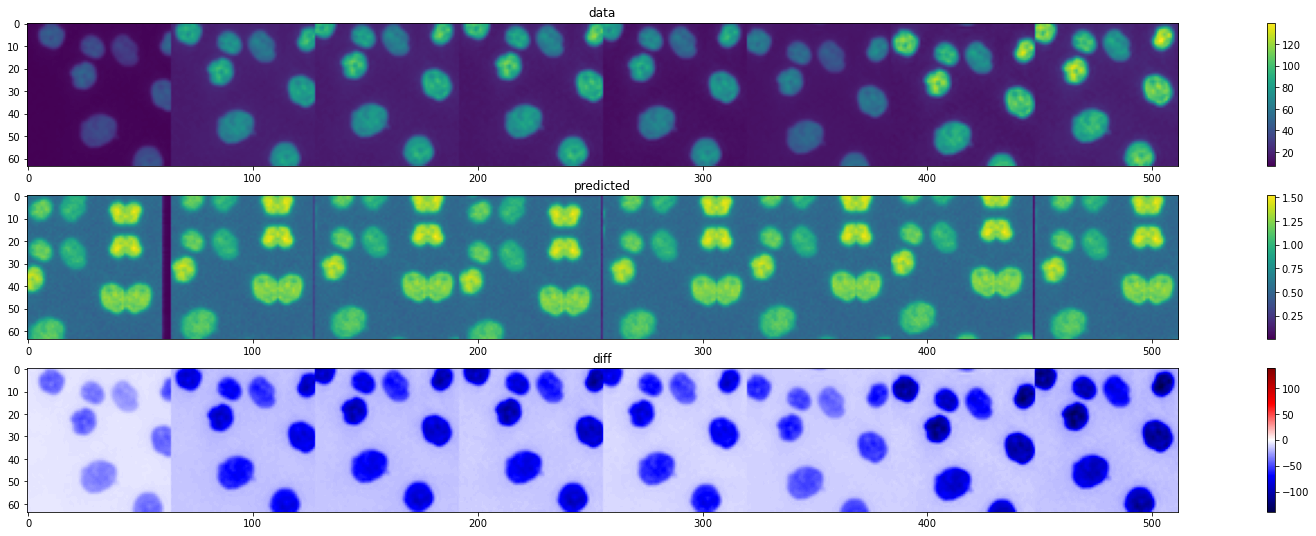

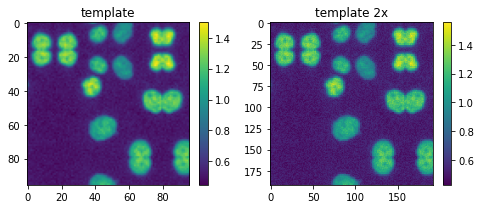

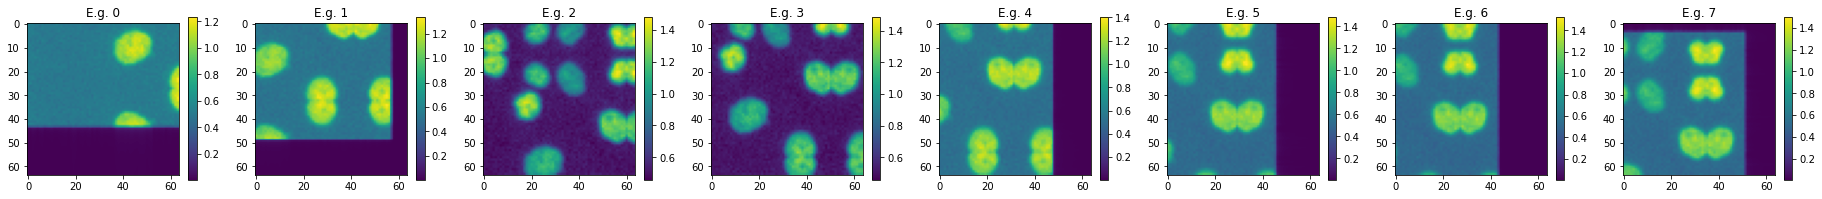

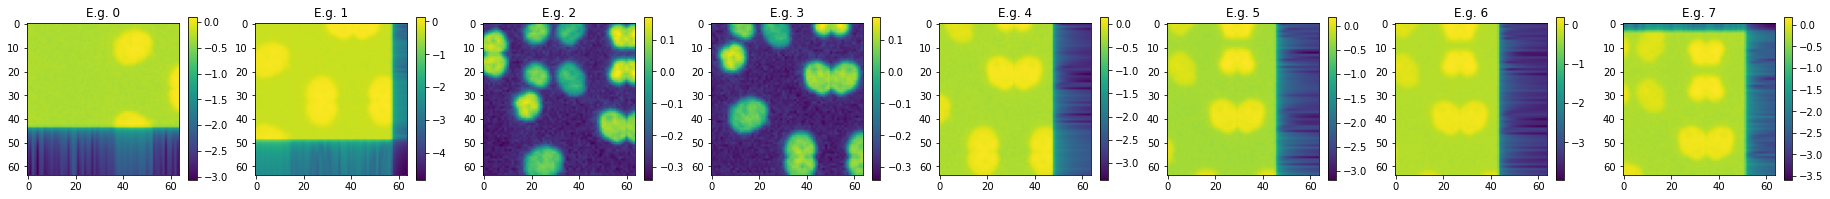

In [19]:
reload(model)
print(train_image_dataloader.dataset[0][0].shape)
encoder_model = model.Template2DModel(feedback_class=model.CropAndConcatFeedbackModel,
                                      img_size=(64,64),
                                      fit_params=['x','y'],
                                      # max_psf_count=3,
                                      renderer_params={"template_init":train_image_dataloader.dataset[0][0].mean(0),
                                                       "template_padding":(16,16)},
                                      encoder_params={"depth":4, "first_layer_out_channels":16,},)
# print(summary(encoder_model, input_size=(8, 1, 64, 64), row_settings=["var_names"],))

model.check_model(encoder_model, train_image_dataloader)